Question 1: 

Analyzing Initial Information

- Naive AOV calculation is $3145.13
- This number seems very high considering the "one model of shoe" that these 100 stores sell are "relatively affordable" as mentioned in the question and using my inference as well.

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

.py file: ***Refer to the .py file*** There could be various things wrong with this calculation and therefore in my program I added a few error checks based on certain factors. For example, I added a function called errorOrderID in case the data was wrong and somehow the system inputted a duplicate of the order (since all OrderID’s should be different). I thought this could be a reason as to why the AOV is so high. I also added a function called errorTotalItems which would cancel out any orders that was above $300/sneaker. I chose the value of $300 because anything above $400 would give me an AOV of >$2700 which also seems very high. This caused my AOV calculation to be a lot lower and cancelled a lot of the outliers. Please check the code I wrote for line-by-line comments which may be easier to understand.

.ipynb file: As seen below there are a few orders that have an order amount of roughly $700,000 which seems unusually high for selling the same sneaker model. 

b. What metric would you report for this dataset?

Therefore with the .py file I have removed the outliers, but the .ipynb file I have kept them. The mean of this data is not an appropriate way to evaluate this data due to the few points of data that skew the evaluation. A much better way would be to use the median.

c. What is its value?
- From the .py file (calculated mean but removed outliers), a more accurate average order value is $300.16
- From the .ipynb file (median), a more accurate average order value is $284.00

In [ ]:
#Brandon Goh
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Loading the CSV
purchases_df = pd.read_csv('data.csv')
purchases_df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [44]:
total = purchases_df['order_amount'].sum()
orders = purchases_df['order_amount'].count()
aov = total / orders
#or purchases_df["order_amount"].mean()
#Just confirming the naive AOV
print(round(aov,2))

3145.13


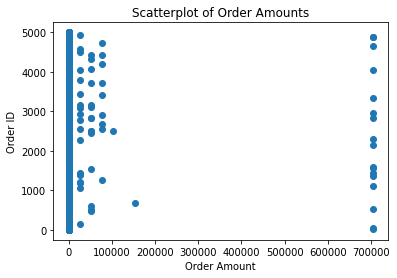

In [45]:
plt.scatter(x='order_amount',y='order_id', data=purchases_df)
plt.title('Scatterplot of Order Amounts')
plt.xlabel('Order Amount')
plt.ylabel('Order ID')
plt.show()
#Visual to show data to help analyze

In [51]:
purchases_df["order_amount"].median()

284.0

Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

How many orders were shipped by Speedy Express in total? 

After inspecting the tables, I realized that both Shippers and Orders tables had the ShipperID in common. I went to the Orders table and found how many records had the same ShipperID and corresponded to the ShipperName (in Shippers table) of “Speedy Express”.

Answer: 54

SELECT COUNT(*)
FROM Shippers, Orders
WHERE Orders.ShipperID = Shippers.ShipperID
AND ShipperName = 'Speedy Express';



What is the last name of the employee with the most orders?

After inspecting the tables, I found that the correlation between the Orders and Employees tables was the EmployeeID. Then, I found where the EmployeeID matches the entries from both tables, grouped them by their ID and returned the most orders from sorting by descending order.
Answer: Peacock

SELECT employ.LastName
FROM Orders ords, Employees employ
WHERE employ.EmployeeID = ords.EmployeeID
GROUP BY ords.EmployeeID
ORDER BY COUNT(*) DESC
LIMIT 1;



What product was ordered the most by customers in Germany?

After inspecting the tables, the correlation from the CustomerID, OrderID and ProductID was used to find what product was ordered the most by customers in Germany.

Answer: Boston Crab Meat

FROM Products product, OrderDetails ordsdet, Customers cstmer, Orders ords
WHERE cstmer.Country = "Germany"
	AND cstmer.CustomerID = ords.CustomerID
	AND ords.OrderID = ordsdet.OrderID
    AND ordsdet.ProductID = product.ProductID
LIMIT 1;
